# 🤖 09_Holdout_Evaluation — Перевірка фінальної моделі (Hold-out Test)
# Project: Прогнозування Відтоку Клієнтів
# Team Lead: Vitalii Subbotin
# Date: 2025-10-16

In [1]:
# 1. Імпорт бібліотек
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
)

sns.set(style="whitegrid")

In [2]:
# 2. Шляхи
BASE_DIR = Path("..")
MODELS_DIR = BASE_DIR / "models"
MODEL_PATH = MODELS_DIR / "best_model_lgb.pkl"
SCALER_PATH = MODELS_DIR / "scaler.pkl"
X_HOLDOUT_PATH = MODELS_DIR / "X_holdout.csv"
Y_HOLDOUT_PATH = MODELS_DIR / "y_holdout.csv"

print("✅ Завантаження артефактів...")

✅ Завантаження артефактів...


In [3]:
# 3. Завантаження даних
X_holdout = pd.read_csv(X_HOLDOUT_PATH)
y_holdout = pd.read_csv(Y_HOLDOUT_PATH).squeeze()

model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)

print("✅ Модель та дані успішно завантажено.")
print("Hold-out набір:", X_holdout.shape, "з мітками:", y_holdout.shape)

✅ Модель та дані успішно завантажено.
Hold-out набір: (14379, 10) з мітками: (14379,)


In [4]:
# 4. Прогноз
y_pred = model.predict(X_holdout)
y_proba = model.predict_proba(X_holdout)[:, 1]

In [5]:
# 5. Обчислення метрик
acc = accuracy_score(y_holdout, y_pred)
prec = precision_score(y_holdout, y_pred)
rec = recall_score(y_holdout, y_pred)
f1 = f1_score(y_holdout, y_pred)
roc = roc_auc_score(y_holdout, y_proba)

print("\n📊 Результати на hold-out тесті:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc:.4f}")


📊 Результати на hold-out тесті:
Accuracy:  0.9467
Precision: 0.9605
Recall:    0.9432
F1-score:  0.9518
ROC-AUC:   0.9836


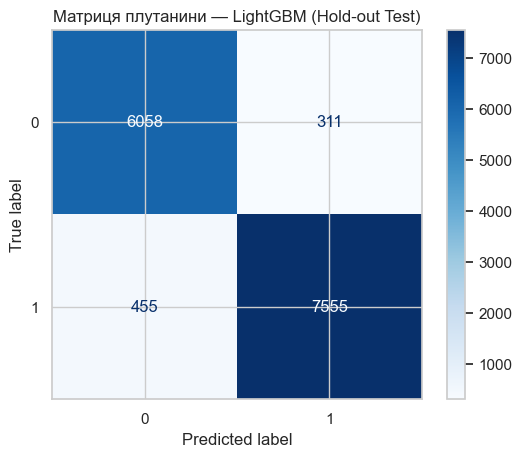

In [6]:
# 6. Матриця плутанини
ConfusionMatrixDisplay.from_predictions(y_holdout, y_pred, cmap="Blues")
plt.title("Матриця плутанини — LightGBM (Hold-out Test)")
plt.show()

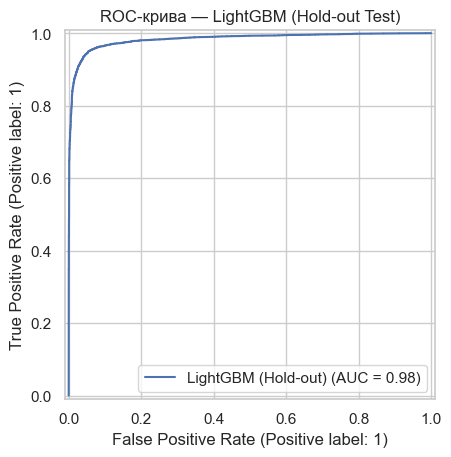

In [7]:
# 7. ROC-крива
RocCurveDisplay.from_predictions(y_holdout, y_proba, name="LightGBM (Hold-out)")
plt.title("ROC-крива — LightGBM (Hold-out Test)")
plt.show()

In [8]:
# 8. Збереження результатів
results = pd.DataFrame([{
    "model": "LightGBM_final_holdout",
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1": f1,
    "roc_auc": roc
}])

results_path = MODELS_DIR / "final_holdout_results.csv"
results.to_csv(results_path, index=False)
print(f"\n✅ Результати збережено у: {results_path}")


✅ Результати збережено у: ..\models\final_holdout_results.csv
